<a href="https://colab.research.google.com/github/Surajpatra700/Potato_Leaf_Prediction_Model/blob/main/Leaf_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [39]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=30

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/datasets/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2157 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

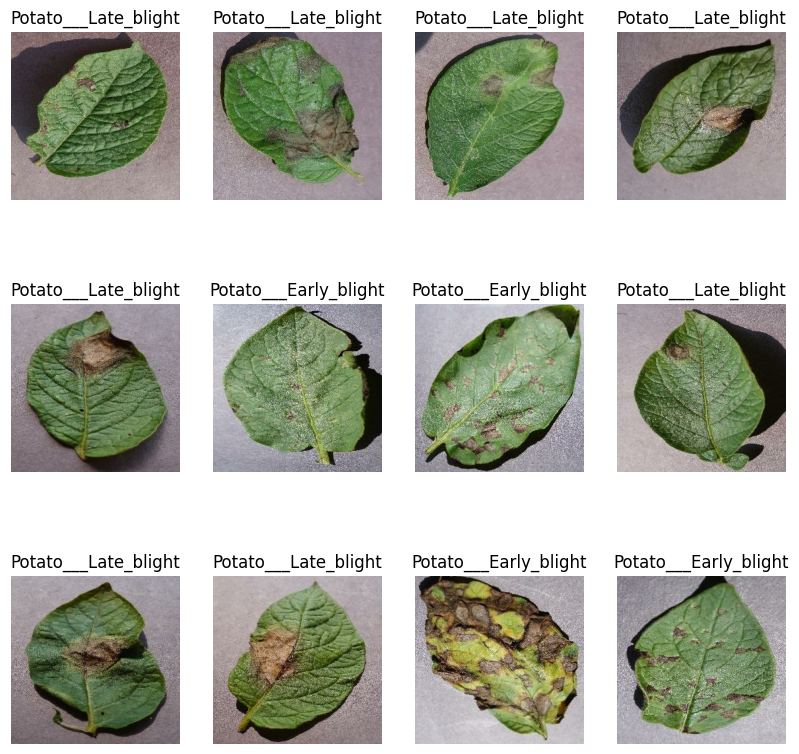

In [9]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
  # print(image_batch.shape)
  # print(label_batch.numpy())
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])

In [10]:
len(dataset)

68

In [11]:
#  80% --> training
#  20% --> 10% validation, 10% test

In [12]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54) # it will skip 1st 54 dataset
len(test_ds)

14

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(len(ds) * train_split)
  val_size = int(len(ds) * val_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
#  Pipelining 3 function into 1
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
#  Model Building

input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNEL)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [40]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/30
54/54 [==============================] - 3s 62ms/step - loss: 0.0922 - accuracy: 0.9670 - val_loss: 0.1019 - val_accuracy: 0.9635
Epoch 2/30
54/54 [==============================] - 4s 65ms/step - loss: 0.0707 - accuracy: 0.9757 - val_loss: 0.0304 - val_accuracy: 0.9948
Epoch 3/30
54/54 [==============================] - 3s 60ms/step - loss: 0.0864 - accuracy: 0.9688 - val_loss: 0.6391 - val_accuracy: 0.8073
Epoch 4/30
54/54 [==============================] - 3s 61ms/step - loss: 0.0666 - accuracy: 0.9780 - val_loss: 0.5665 - val_accuracy: 0.8385
Epoch 5/30
54/54 [==============================] - 3s 63ms/step - loss: 0.0513 - accuracy: 0.9832 - val_loss: 0.1237 - val_accuracy: 0.9427
Epoch 6/30
54/54 [==============================] - 4s 65ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.0503 - val_accuracy: 0.9792
Epoch 7/30
54/54 [==============================] - 3s 61ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0472 - val_accuracy: 0.9792
Epoch 8/30
54

In [42]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 26ms/step - loss: 0.0763 - accuracy: 0.9688


[0.07629512995481491, 0.96875]

In [43]:
history

In [44]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
history.history["accuracy"]

[0.9670138955116272,
 0.9756944179534912,
 0.96875,
 0.9780092835426331,
 0.9832175970077515,
 0.9797453880310059,
 0.9866898059844971,
 0.9809027910232544,
 0.9895833134651184,
 0.9774305820465088,
 0.9878472089767456,
 0.9953703880310059,
 0.9837962985038757,
 0.9820601940155029,
 0.9936342835426331,
 0.9872685074806213,
 0.9878472089767456,
 0.9832175970077515,
 0.9832175970077515,
 0.9791666865348816,
 0.9907407164573669,
 0.9953703880310059,
 0.9861111044883728,
 0.984375,
 0.9947916865348816,
 0.9895833134651184,
 0.9884259104728699,
 0.9942129850387573,
 0.9959490895271301,
 0.9918981194496155]

In [47]:
acc =history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss= history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

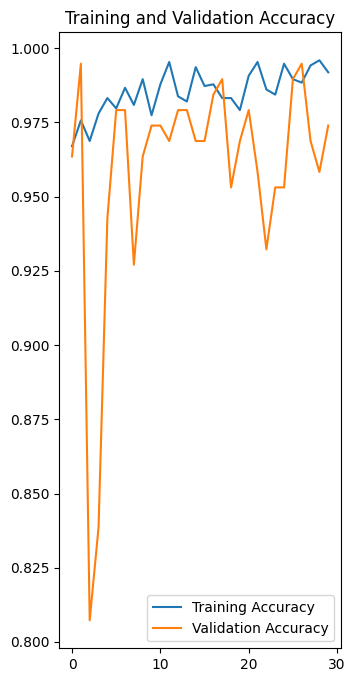

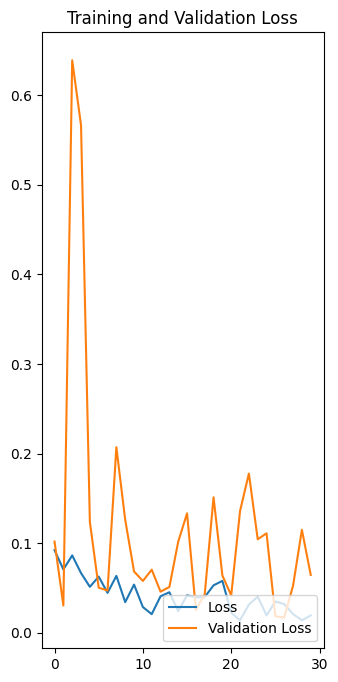

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label="Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")

Image Prediction
Actual label:  Potato___healthy
1/1 [==============================] - 0s 38ms/step
predicted label:  Potato___healthy


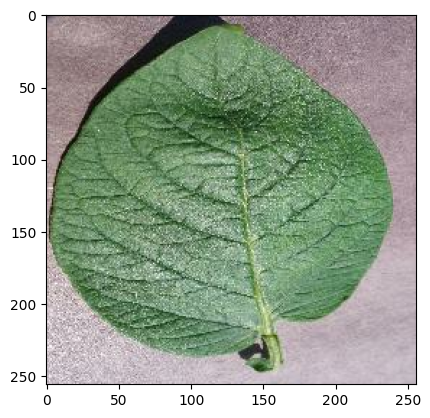

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0].numpy()

  print("Image Prediction")
  plt.imshow(first_image)
  print("Actual label: ",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) # create a branch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 44ms/step


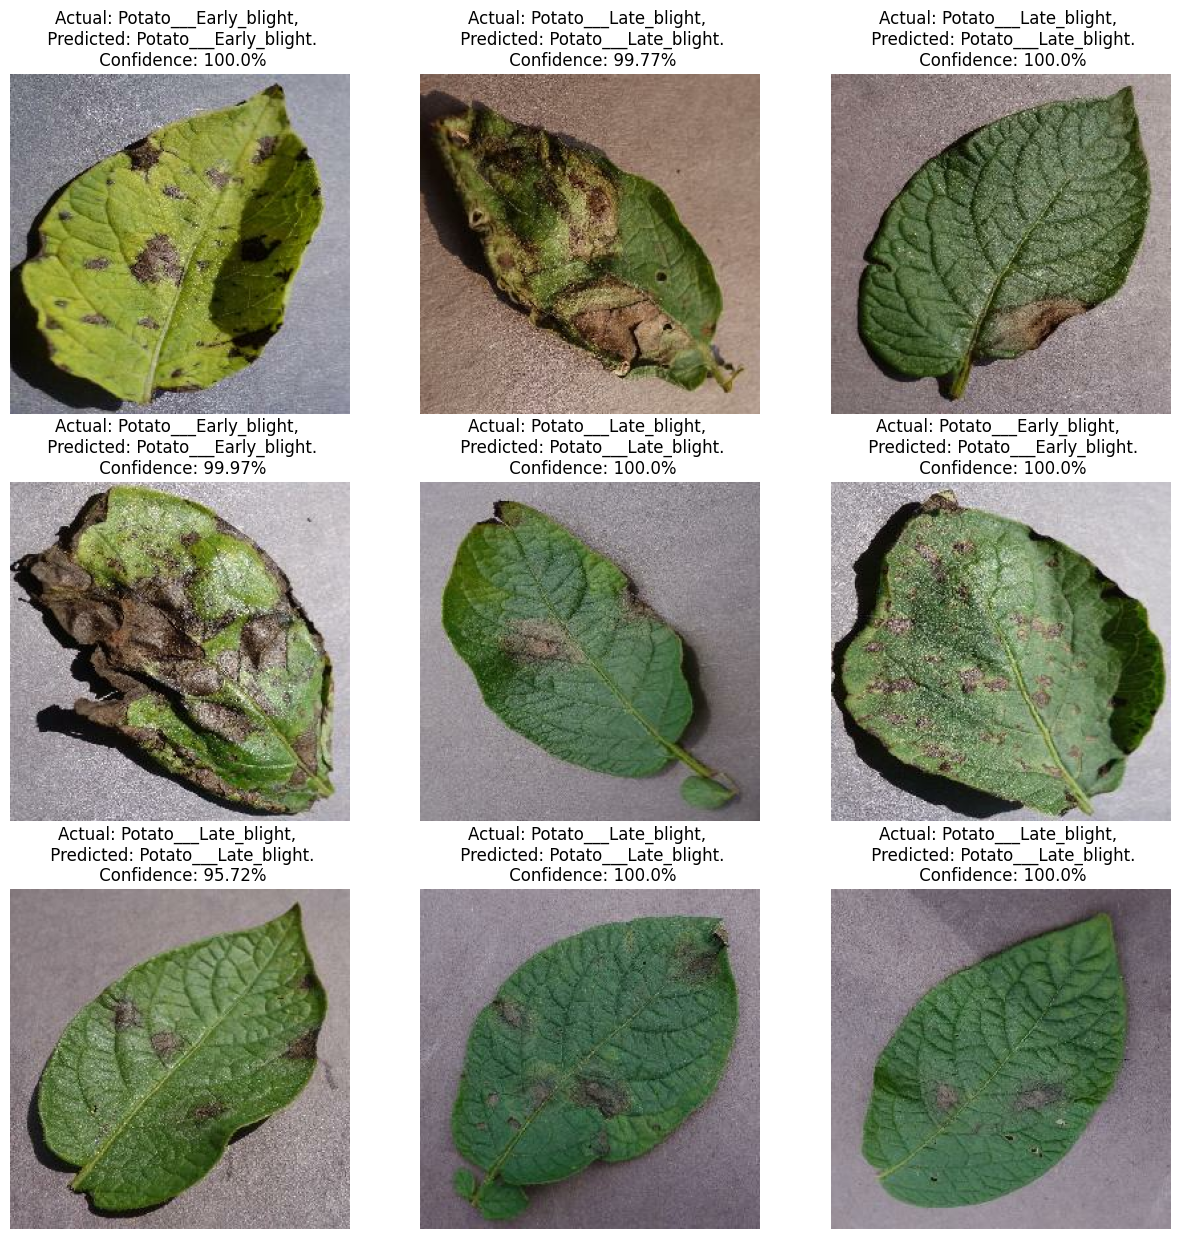

In [52]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

In [54]:
model_versions = 2
model.save(f"/content/drive/MyDrive/datasets/{model_versions}")